In [29]:
%run header

In [265]:
# read results
import pandas as pd
df1 = pd.read_csv("data/physics-survey.csv")
wedgeprops = {'linewidth' : .7 , 'edgecolor' : 'black'}

In [295]:
print "Sample size "+str(len(df1))

Sample size 38


## Question: How often do you reproduce datasets in your analysis?

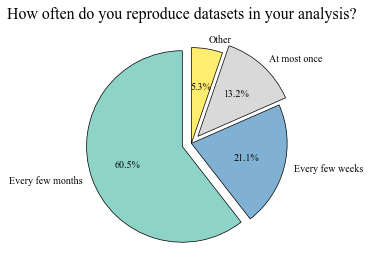

In [296]:
colors = plt.cm.Set3(np.linspace(0,1,4))
explode = (0.1, 0, 0)
explode1 = (0.1, 0, 0.1, 0)

a = df1.loc[df1['Student'] == 'Yes'][df1.columns[7]].value_counts()
b = df1.loc[df1['Student'] == 'No'][df1.columns[7]].value_counts()
t = df1[df1.columns[7]].value_counts()

f, ax3 = plt.subplots()
f.suptitle("How often do you reproduce datasets in your analysis?", fontsize=16)
ax3.pie(tuple(t), explode=explode1, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

#ax3.set_title("All", fontsize=14)

ax3.axis('equal') 

plt.show()
f.savefig('how_often_reproduce.pdf', dpi=100)

# Question: Do you have a code repository for your analysis?

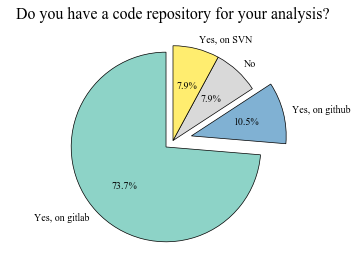

In [297]:
a = df1.loc[df1['Student'] == 'Yes'][df1.columns[6]].value_counts()
b = df1.loc[df1['Student'] == 'No'][df1.columns[6]].value_counts()
t = df1[df1.columns[6]].value_counts()

colors = plt.cm.Set3(np.linspace(0,1,4))
explode = (0.1, 0, 0)
explode1 = (0.1, 0.2, 0, 0)

f, ax3 = plt.subplots()
f.suptitle("Do you have a code repository for your analysis?", fontsize=16)
ax3.pie(tuple(t), explode=explode1, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

ax3.axis('equal') 

plt.show()
f.savefig('analysis_repo.pdf', dpi=100)

# Question: Do you have access to your colleagues' code?

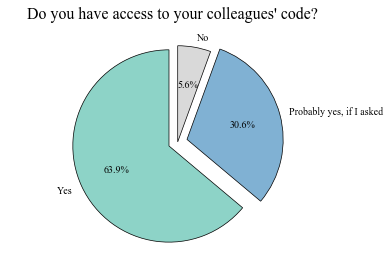

In [298]:
explode = (0.1, 0.1, 0)

t = df1[df1.columns[5]].value_counts()
f, ax3 = plt.subplots()
f.suptitle("Do you have access to your colleagues' code?", fontsize=16)
ax3.pie(tuple(t), explode=explode, labels=tuple(t.index), autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors, wedgeprops=wedgeprops)

ax3.axis('equal') 
plt.show()
f.savefig('code_access.pdf', dpi=100)

# Survey question: How familiar are you with ___ ?

In [299]:
# replace some values to fit the screen

df1 = df1.replace('Used it once or twice', 'Used it once or\ntwice')
df1 = df1.replace('Customizing it for my purpose', 'Customizing it\nfor my purpose')

options = ['Never used', 'Used it once or\ntwice', 'Using it regularly', 'Customizing it\nfor my purpose']
mapping = {opt: i for i, opt in enumerate(options)}
key = df1[df1.columns[1]].map(mapping)
df1.iloc[key.argsort()]

l = list()
l.append(df1[df1.columns[1]].value_counts()) # docker
l.append(df1[df1.columns[2]].value_counts()) # cont int
l.append(df1[df1.columns[3]].value_counts()) # pipeline sys
l.append(df1[df1.columns[4]].value_counts()) # open stack

# some wild result tuning
for le in l:
    if 'Using it regularly' not in le.index:
        le['Using it regularly'] = 0
    if 'Customizing it\nfor my purpose' not in le.index:
        le['Customizing it\nfor my purpose'] = 0
    if 'Never used' not in le.index:
        le['Never used'] = 0
    if 'Used it once or\ntwice' not in le.index:
        le['Used it once or\ntwice'] = 0

In [223]:
# sorting
custom_sort = {'Never used':0, 'Used it once or\ntwice':1, 'Using it regularly':2, 'Customizing it\nfor my purpose':3}  
nl = list()
for idf in l:
    idf = idf.to_frame()
    idf['inx'] = idf.index
    idf['sorti'] = idf['inx'].map(custom_sort)
    idf = idf.sort_values(by=['sorti'])
    nl.append(idf)
del l

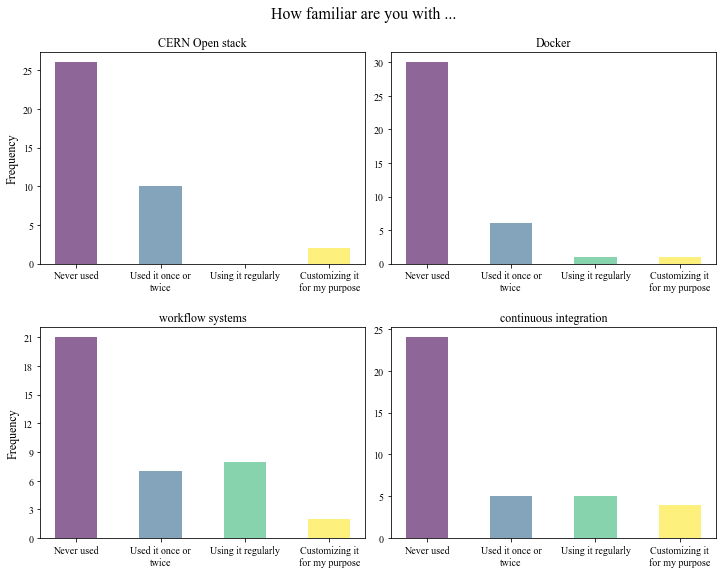

In [306]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("How familiar are you with ...", fontsize=16)
n_groups = 4
y_pos = [1,2,3,4]
bar_width = 0.5
opacity = 0.6
fontsize = 12
col = plt.cm.viridis(np.linspace(0,1,4))

# first box, open stack
ax1.bar(y_pos, tuple(nl[3][nl[3].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax1.set_ylabel('Frequency', fontsize=fontsize)
ax1.set_title('CERN Open stack', fontsize=fontsize)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(tuple(nl[3][nl[3].columns[1]]))

# second
ax2.set_title("Docker")
ax2.bar(y_pos, tuple(nl[0][nl[0].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax2.set_xticks(y_pos)
#ax2.set_ylabel('Frequency', fontsize=fontsize)
ax2.set_xticklabels(tuple(nl[0][nl[0].columns[1]]))

# third
from matplotlib.ticker import MaxNLocator
ax3.set_ylabel('Frequency', fontsize=fontsize)
ax3.set_title("workflow systems")
ax3.bar(y_pos, tuple(nl[2][nl[2].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax3.set_xticks(y_pos)
ax3.set_xticklabels(tuple(nl[2][nl[2].columns[1]]))
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

# forth
ax4.set_title("continuous integration")
#ax4.set_ylabel('Frequency', fontsize=fontsize)
ax4.bar(y_pos, tuple(nl[1][nl[1].columns[0]]), bar_width, alpha=opacity, align='center', color=col)
ax4.set_xticks(y_pos)
ax4.set_xticklabels(tuple(nl[1][nl[1].columns[1]]))

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)
fig.subplots_adjust(top=0.9)
plt.show()

fig.savefig('familiar_tool.pdf', dpi=100)

# Question: What software do you use in your analysis?

In [302]:
dr = df1[df1.columns[8]].str.split(";")

slist =[]
for x in dr:
    slist.extend(x)
    
df = pd.DataFrame(slist, columns=['response'])
vc = df['response'].value_counts()
df2 = vc.to_frame()
df2

,response
python,36
ROOT,34
C++,28
bash scripts,22
Official experiment software,20
makefile,14
snakemake,1
R,1
Htcondor and dagman,1


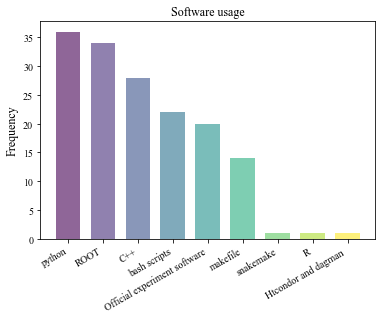

In [304]:
col = plt.cm.viridis(np.linspace(0,1,len(df2)))
bar_width = 0.7
fig, ax = plt.subplots()
ax.set_title("Software usage")
ax.set_ylabel('Frequency', fontsize=fontsize)
y_pos = np.arange(1, len(df2)+1)
ax.bar(y_pos, tuple(df2['response']), bar_width, alpha=opacity, align='center', color=col)
ax.set_xticks(y_pos)
ax.set_xticklabels(tuple(df2.index))

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

fig.tight_layout()
fig.savefig('software.pdf', dpi=100)